# 1️⃣ TF-IDF + Logistic Regression on AG News


### 🧠 Model: Logistic Regression + TF-IDF
**Dataset:** AG News  
**Classes:** 4  
**Technique:** A strong baseline using bag-of-words features. We use TF-IDF vectorization followed by multinomial Logistic Regression with a One-vs-Rest strategy.

This method is efficient, interpretable, and works well for simple text classification tasks.


In [ ]:
def load_kaggle_dataset(dataset_path, unzip=True):
    """
    Load a Kaggle dataset in Google Colab.

    Args:
        dataset_path (str): The Kaggle dataset path in the form 'username/dataset-name'
        unzip (bool): Whether to unzip the dataset after downloading (default: True)

    Returns:
        str: The path to the dataset folder
    """
    import os
    import zipfile

    # Make directory and move kaggle.json
    os.makedirs("/root/.kaggle", exist_ok=True)
    if not os.path.exists("/root/.kaggle/kaggle.json"):
        from google.colab import files
        print("Please upload your kaggle.json file")
        files.upload()
        os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
    os.chmod("/root/.kaggle/kaggle.json", 600)

    # Install kaggle if needed
    # !pip install -q kaggle

    # Download dataset
    dataset_dir = dataset_path.split("/")[-1]
    !kaggle datasets download -d {dataset_path} -p data/

    # Unzip if needed
    if unzip:
        with zipfile.ZipFile(f"data/{dataset_dir}.zip", "r") as zip_ref:
            zip_ref.extractall("data/")
        print(f"✅ Dataset extracted to: data/{dataset_dir}")
        return f"data/{dataset_dir}"
    else:
        print(f"📦 Dataset zip saved to: data/{dataset_dir}.zip")
        return f"data/{dataset_dir}.zip"


In [ ]:
dataset_path = "amananandrai/ag-news-classification-dataset"
dataset_folder = load_kaggle_dataset(dataset_path)

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset
License(s): unknown
  0% 0.00/11.4M [00:00<?, ?B/s]
100% 11.4M/11.4M [00:00<00:00, 1.03GB/s]
✅ Dataset extracted to: data/ag-news-classification-dataset


## Logistic Regression + TF-IDF on AG News

In [ ]:
# Install & Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load AG News Dataset from Kaggle
df = pd.read_csv('data/train.csv')
df.columns = ['Class Index', 'Title', 'Description']

In [ ]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
# Combine title + description for better context
df['text'] = df['Title'] + ". " + df['Description']
df['label'] = df['Class Index'] - 1  # make labels 0-indexed

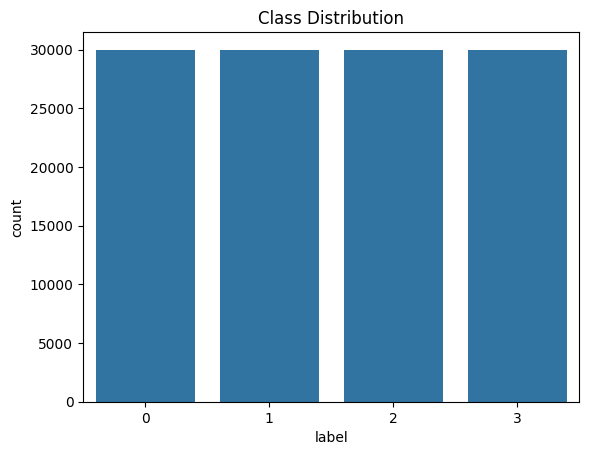

In [ ]:
# Class Distribution
sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.show()

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train Logistic Regression
model = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
# Evaluate Model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['World', 'Sports', 'Business', 'Sci/Tech']))

Accuracy: 0.9153333333333333

Classification Report:
               precision    recall  f1-score   support

       World       0.93      0.90      0.91      5956
      Sports       0.95      0.98      0.97      6058
    Business       0.88      0.89      0.88      5911
    Sci/Tech       0.90      0.89      0.89      6075

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.91     24000
weighted avg       0.92      0.92      0.92     24000

